In [1]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn import neighbors
from sklearn.linear_model import LogisticRegression
import warnings
# Suppress annoying harmless error.
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.set_style("whitegrid")

%matplotlib inline

# Data

## Read data

In [11]:
iris = sns.load_dataset("iris")

# need to binarize target variable species
classes = ['setosa','versicolor','virginica']
z = {'setosa': 0, 'versicolor': 1,'virginica': 2}
z_inv = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}

iris['species_num'] = iris.species.map(z)

X = iris.drop(['species', 'species_num'], axis=1)
y = iris['species_num']
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=0) 

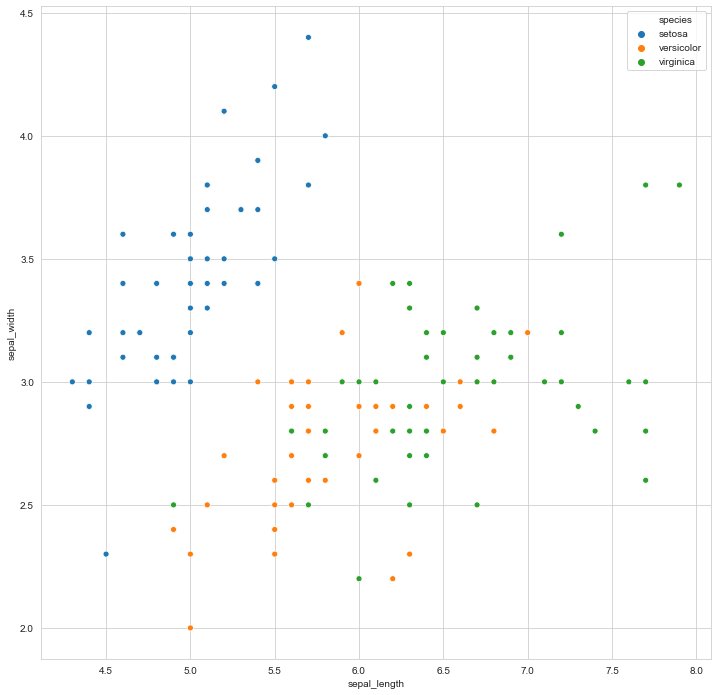

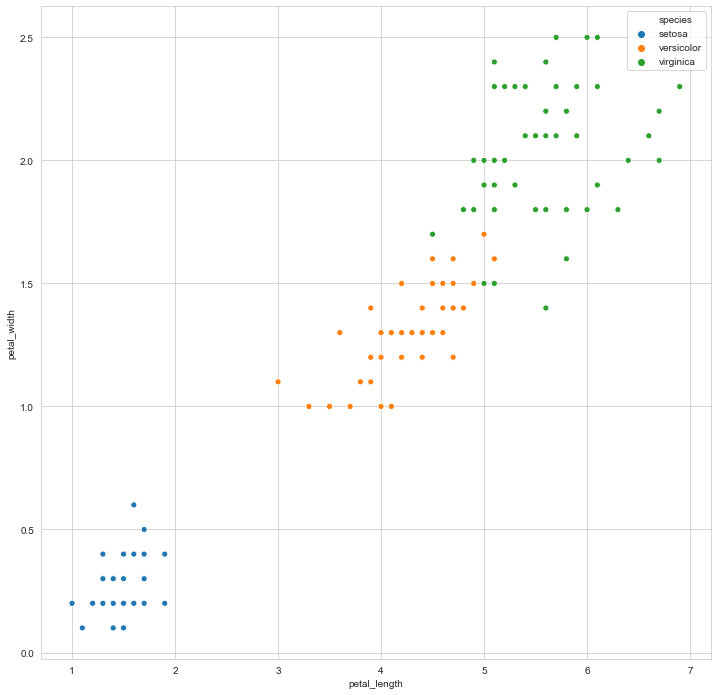

In [3]:
plt.figure(figsize=(12,12))
sns.scatterplot('sepal_length', 'sepal_width', hue='species', data=iris)
plt.show()

plt.figure(figsize=(12,12))
sns.scatterplot('petal_length', 'petal_width', hue='species', data=iris)
plt.show()

*Let us add some dummy variables for distinguishing virginica from versicolor species.*

# Regression

This is a classification task, so regression doesn't really make sense. However, to demonstrate it's downfalls for this application, we are going to use partial least squares regression, but first we need to transform our input features as they are all very collinear. We can log everything (essentially performing logistic-regression), or PCA the 4 input features. We will try both methods.

## Logistic Regression

Train score: 0.93


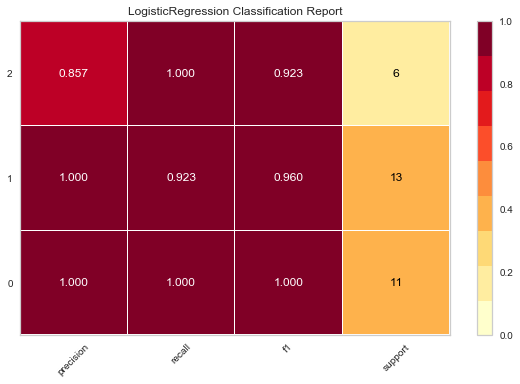

In [4]:
from yellowbrick.classifier import ClassificationReport

# Instantiate our model and store it in a new variable.
logr = LogisticRegression(random_state=0)

# Fit our model to the data.
logr.fit(X_train, y_train)
print('Train score: {:.2f}'.format(logr.score(X_train, y_train)))

# Instantiate the classification model and visualizer
logr = LogisticRegression(random_state=0)
visualizer = ClassificationReport(logr, support=True)

visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof() 

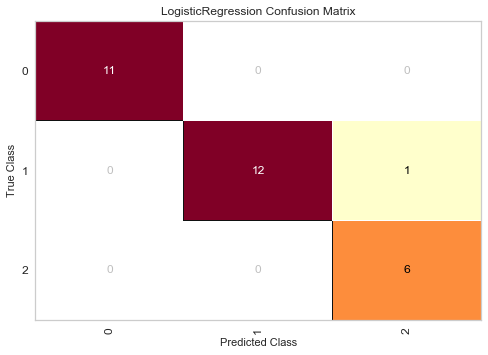

In [14]:
from yellowbrick.classifier import ConfusionMatrix

# iris = load_iris()
# X = iris.data
# y = iris.target
# classes = iris.target_names

# X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=0)

model = LogisticRegression()

iris_cm = ConfusionMatrix(
    LogisticRegression()
)

iris_cm.fit(X_train, y_train)
iris_cm.score(X_test, y_test)

iris_cm.poof()

In [8]:
z_inv

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

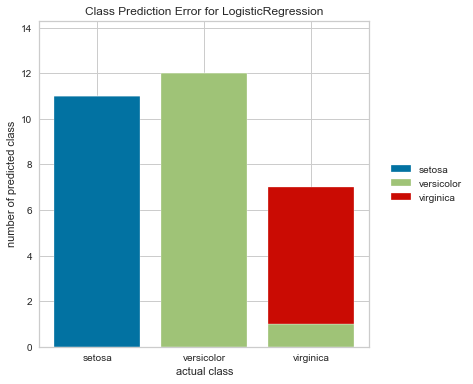

In [17]:
from yellowbrick.classifier import ClassPredictionError

# Instantiate the classification model and visualizer
visualizer = ClassPredictionError(
    LogisticRegression(), classes=classes
)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
g = visualizer.poof()

# KNN

In [39]:
import plotly
import plotly.plotly as py
import plotly.figure_factory as ff


plotly.tools.set_credentials_file(username='mitch.murphy', api_key='HcrZLslya6TQUsXIU3ck')

X = np.array(X_train)

dendro = ff.create_dendrogram(X)
dendro['layout'].update({'width':800, 'height':500})
py.iplot(dendro, filename='iris_train_dendrogram')

/Users/mitchellmurphy/anaconda3/envs/python3.7/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [58]:
# Unweighted (uniform)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train) 
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)
print("KNN Score (Train): {}".format(knn.score(X_train, y_train)))
print("KNN Score (Test): {}".format(knn.score(X_test, y_test)))

KNN Score (Train): 0.95
KNN Score (Test): 0.9666666666666667


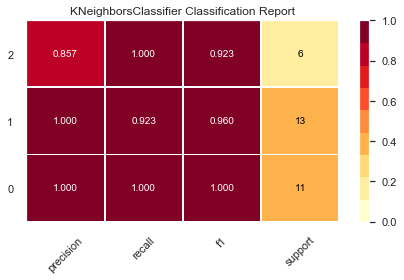

In [59]:
# Instantiate the classification model and visualizer
knn = KNeighborsClassifier(n_neighbors=3)
visualizer = ClassificationReport(knn, support=True)

visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof() 

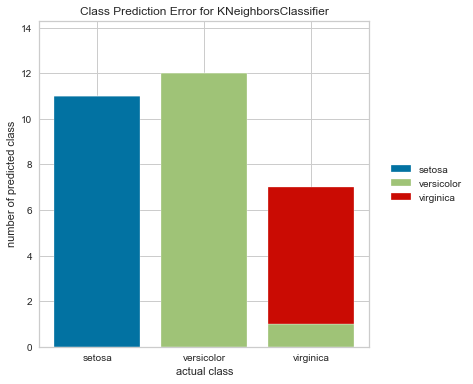

In [18]:
# Instantiate the classification model and visualizer
visualizer = ClassPredictionError(
    KNeighborsClassifier(n_neighbors=3), classes=classes
)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
g = visualizer.poof()

**Weighted**

In [62]:
# Weighted by distance
knn_w = KNeighborsClassifier(n_neighbors=3, weights="distance")
knn_w.fit(X_train, y_train) 
y_pred_train = knn_w.predict(X_train)
y_pred_test = knn_w.predict(X_test)
print("KNN Score (Train): {}".format(knn_w.score(X_train, y_train)))
print("KNN Score (Test): {}".format(knn_w.score(X_test, y_test)))

KNN Score (Train): 1.0
KNN Score (Test): 1.0


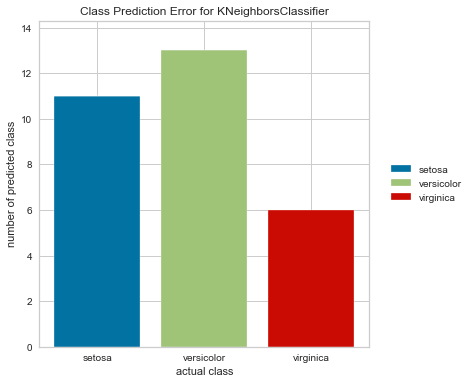

In [19]:
# Instantiate the classification model and visualizer
visualizer = ClassPredictionError(
    KNeighborsClassifier(n_neighbors=3, weights="distance"), classes=classes
)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
g = visualizer.poof()

So the weighted model appears to be 100% accurate, which should raise some eyebrows. One reason for this could be the little amount of information that we have (150 examples), which suggests that this model will not generalize well to unseen data.

# Conclusion

The task at hand with this dataset is to predict the species of Iris plants based on petal length and width as well as sepal length and width. This is a very famous dataset, and by nature is a classification task. This leads me to suspect that the KNN model will be better at this job than a logistic regression model. However, if you plot the input features against each other (with different colors for the species), we see that the setosa species is entirely linearly separable from the 2 other species, and the remaining 2 are also linearly separable, therefore classification on this data should be straightforward. 

A vanilla logistic regression model achieved an accuracy of 93% on the test set, whereas a KNN (unweighted) model achieved an accuracy of 96.67%. Here the only hyper-parameter I tuned was k (number of nearest neighbors), and I found k = 3 to exhibit the best tradeoff between train and test accuracy. Weighting our KNN model using the inverse of the distance leads to 100% accuracy, leading me to be quite skeptical. However, more data is required to assess this difference as we only have 150 examples. 